In [168]:
# Import dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [169]:
mouse_drug_data_to_load = pd.read_csv("data/mouse_drug_data.csv")
mouse_drug_data_to_load.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [170]:
clinical_trial_data_to_load = pd.read_csv("data/clinicaltrial_data.csv")
clinical_trial_data_to_load.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [171]:
# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview

combined_df = pd.merge(mouse_drug_data_to_load, clinical_trial_data_to_load)
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [172]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = combined_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame

mean_tumor_df = pd.DataFrame(mean_tumor)

# Preview DataFrame

mean_tumor_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [173]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_error_tumor = combined_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame

tumor_error_df = pd.DataFrame(standard_error_tumor)

# Preview DataFrame

tumor_error_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [174]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

mean_reformat = mean_tumor_df.reset_index()
mean_pivot = mean_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

error_reformat = tumor_error_df.reset_index()
error_pivot = error_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']


# Preview that Reformatting worked
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


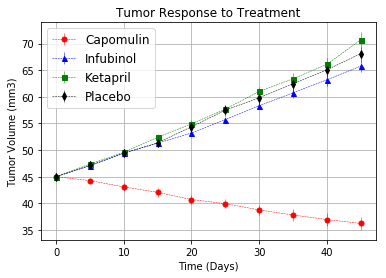

In [175]:
# Generate the Plot (with Error Bars)
#set up x axis of plot
x_axis = np.arange(0, 50, 10)
x_limit = 45

#set plot figure with error bars(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)


plt.figure(figsize=(6,4))

plt.errorbar(mean_pivot.index, mean_pivot["Capomulin"], yerr=error_pivot["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Infubinol"], yerr=error_pivot["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Ketapril"],yerr=error_pivot["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Placebo"],yerr=error_pivot["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)



#set titles and parameters

plt.title("Tumor Response to Treatment") 
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

#set grid style
plt.grid(linestyle="solid")

#set legend
plt.legend(loc='best', fontsize=12)

# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")

# show the figure
plt.show()


## Metastatic Response to Treatment

In [176]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_mean = combined_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame

metastatic_mean_df = pd.DataFrame(metastatic_mean)

# Preview DataFrame

metastatic_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [177]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

metastatic_error = combined_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame

metastatic_error_df = pd.DataFrame(metastatic_error)

# Preview DataFrame

metastatic_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [178]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_reformat = metastatic_mean_df.reset_index()
metastatic_mean_pivot = metastatic_mean_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

metastatic_error_reformat = metastatic_error_df.reset_index()
metastatic_error_pivot = metastatic_error_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
metastatic_error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


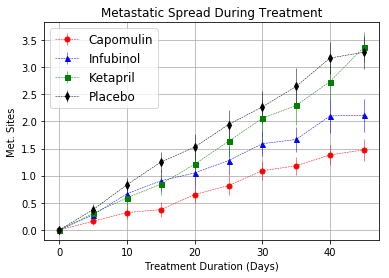

In [180]:
# Generate the Plot (with Error Bars)(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)

plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Capomulin"], yerr=metastatic_error_pivot["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Infubinol"], yerr=metastatic_error_pivot["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Ketapril"],yerr=metastatic_error_pivot["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Placebo"],yerr=metastatic_error_pivot["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)


# Set x and y axis labels including the title of the chart
plt.title('Metastatic Spread During Treatment') # Give plot main title
plt.xlabel('Treatment Duration (Days)') # set text for the x axis
plt.ylabel('Met. Sites') # set text for the y axis

plt.grid(linestyle="solid")
plt.legend(loc='best', fontsize=12)


# Save the Figure
plt.savefig("Metastatic_Spread_During_Treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [181]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_df.groupby(["Drug", "Timepoint"]).count()['Mouse ID']

# Convert to DataFrame
mouse_count = pd.DataFrame({"Mouse Count": mouse_count})

# Preview DataFrame, reviews drug as a whole row, with sub rows within
mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [182]:
# Minor Data Munging to Re-Format the Data Frames
mouse_reformat = mouse_count.reset_index()
mouse_pivot = mouse_reformat.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


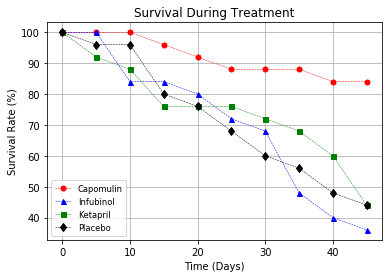

In [183]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mouse_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)

#display chart titles and axis titles
plt.title("Survival During Treatment") 
plt.ylabel("Survival Rate (%)") 
plt.xlabel("Time (Days)")

#display grid legend 
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure as png file
plt.savefig("Survival_During_Treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [184]:
# Calculate the percent changes for each drug
drug_percent_change =  100 * (mean_pivot.iloc[-1] - mean_pivot.iloc[0]) / mean_pivot.iloc[0]
drug_percent_change_sem =  100 * (error_pivot.iloc[-1] - error_pivot.iloc[0]) / error_pivot.iloc[0]

# Display the data to confirm
drug_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

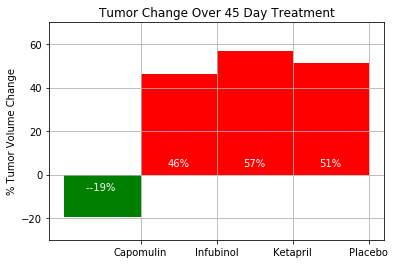

In [185]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (drug_percent_change["Capomulin"], 
               drug_percent_change["Infubinol"], 
               drug_percent_change["Ketapril"], 
               drug_percent_change["Placebo"])

#sublot documentation here (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html)

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))  
width = 1
rectsPass = ax.bar(ind[0], percent_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], percent_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc, set the titles and lables on axis
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure as png file
fig.savefig("Tumor_Change_Over_45_Days.png")

# Show the Figure
fig.show()

In [186]:
#3 observable trends to note in the data

#1. One observable trend is that the placebo has very similar results like the other drugs, a very interesting find
#2. Another observable trend is that Capomulin was the most effective to treating the tumor, the tumor decreased in size in the observed trends
#3. The other three drugs infubinol, ketapril and the placebo had the same effects to tumor treatment, all 3 demonstrated the same results.